In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Histogram

In [8]:
mpg = pd.read_csv('mpg.csv')
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


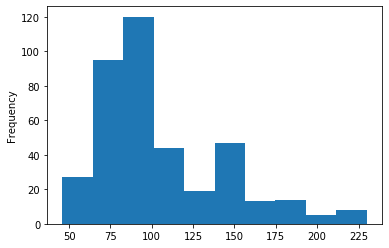

In [9]:
mpg['horsepower'].plot.hist()

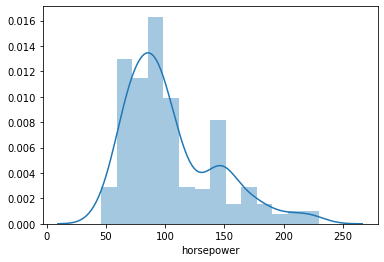

In [11]:
#by default, generates a Gaussian Kernel Density Estimate (KDE)
sns.distplot(mpg['horsepower'])

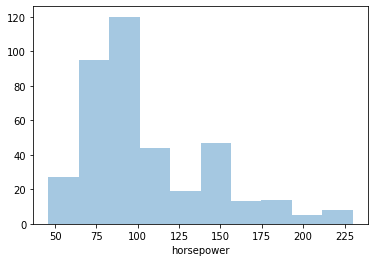

In [12]:
sns.distplot(mpg['horsepower'],kde=False,bins=10)

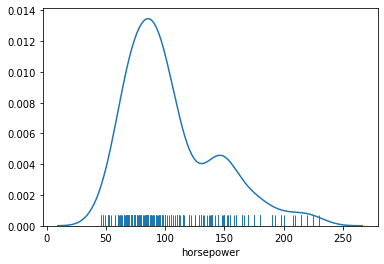

In [13]:
sns.distplot(mpg['horsepower'],hist=False,rug=True)

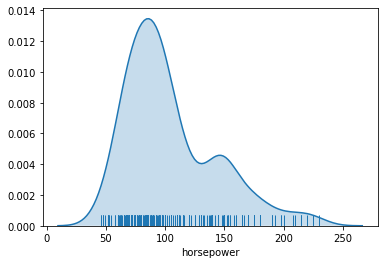

In [14]:
sns.distplot(mpg['horsepower'],hist=False,rug=True,kde_kws={'shade':True})

# Regression plot

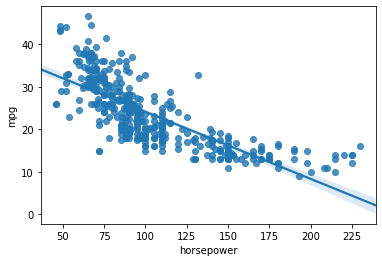

In [17]:
sns.regplot(x='horsepower',y='mpg',data=mpg)

regplot() performs a simple linear regression model fit and plot.   
lmplot() combines regplot() and FacetGrid. 

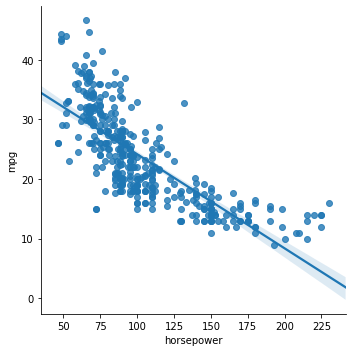

In [18]:
sns.lmplot(x='horsepower',y='mpg',data=mpg)

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


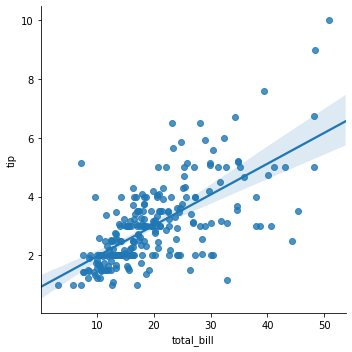

In [21]:
sns.lmplot(x='total_bill',y='tip',data=tips)

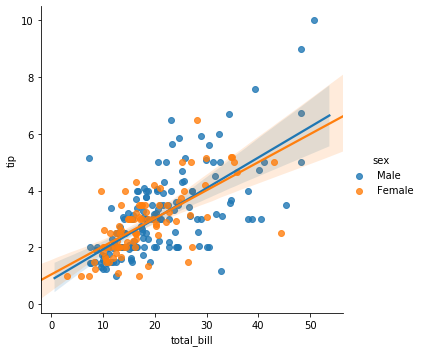

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

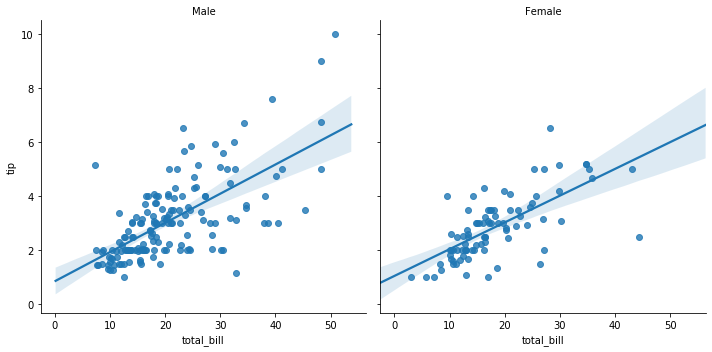

In [25]:
g = sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')
g.set_titles("{col_name}")

# Style

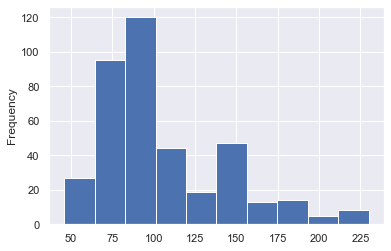

In [26]:
sns.set()
mpg['horsepower'].plot.hist()

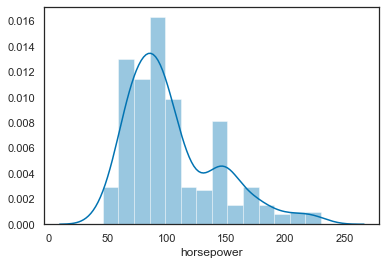

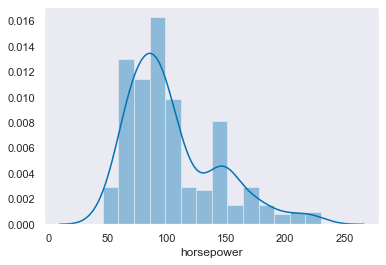

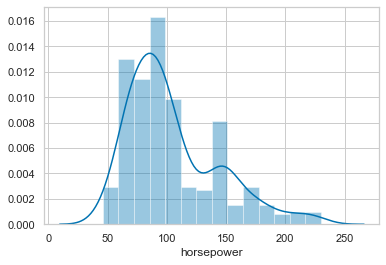

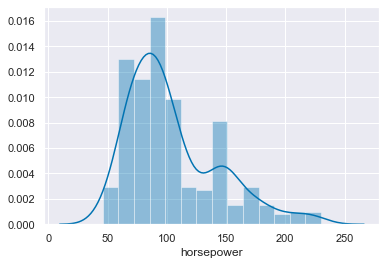

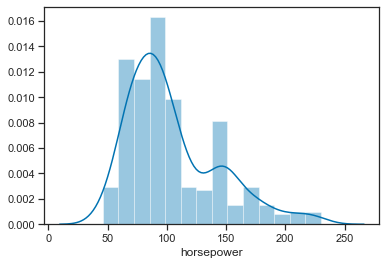

In [66]:
styles = ['white','dark','whitegrid','darkgrid','ticks']
for style in styles:
    sns.set_style(style)
    sns.distplot(mpg['horsepower'])
    plt.show()

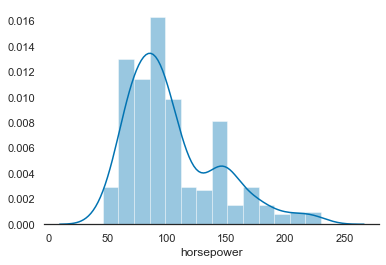

In [54]:
#remove axes
sns.set_style('white')
sns.distplot(mpg['horsepower'])
sns.despine(left=True)

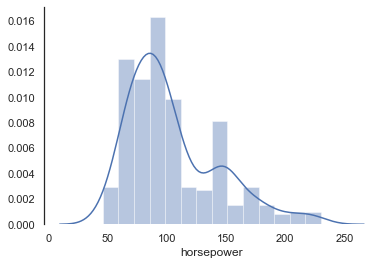

In [35]:
sns.set_style('white')
sns.distplot(mpg['horsepower'])
sns.despine(bottom=True)

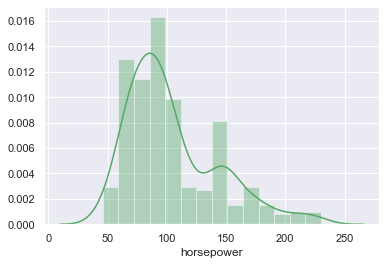

In [37]:
sns.set(color_codes=True)
sns.distplot(mpg['horsepower'],color='g')

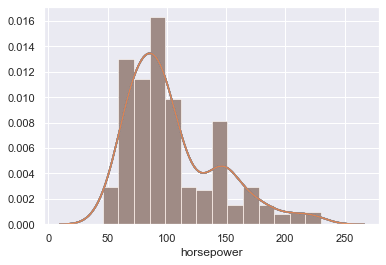

In [40]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.distplot(mpg['horsepower'])
    #plt.show()

## Colors for palette

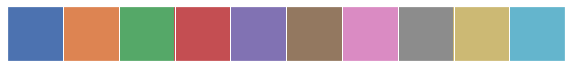

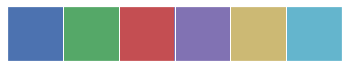

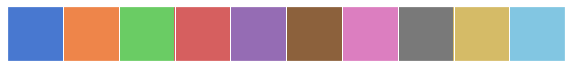

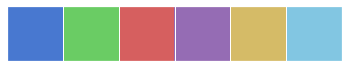

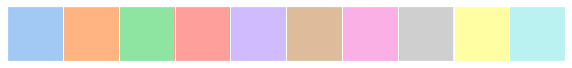

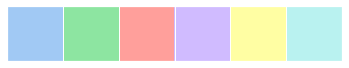

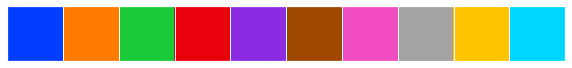

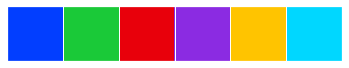

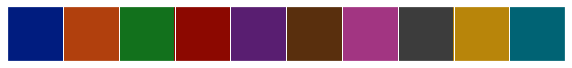

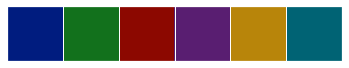

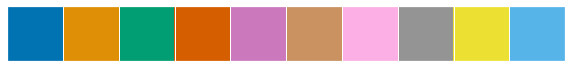

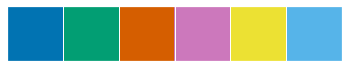

In [41]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.show()

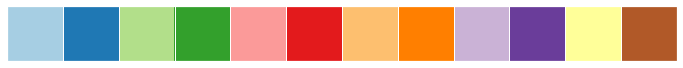

In [43]:
sns.palplot(sns.color_palette('Paired',12))

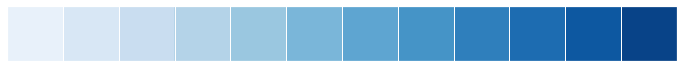

In [44]:
sns.palplot(sns.color_palette("Blues",12))

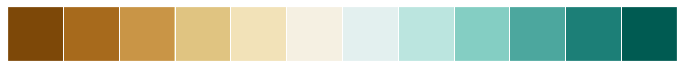

In [45]:
sns.palplot(sns.color_palette("BrBG",12))

# Customizing with matplotlib

## Axes can be passed to seaborn functions

[Text(0.5, 0, 'Horsepower')]

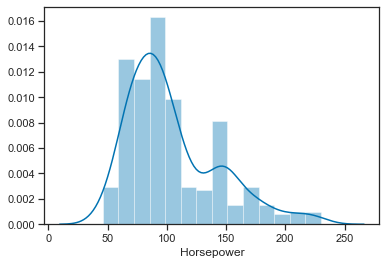

In [67]:
fig,ax = plt.subplots()
sns.distplot(mpg['horsepower'],ax=ax)
ax.set(xlabel='Horsepower')

[Text(0, 0.5, 'Distribution'),
 (25, 250),
 Text(0.5, 0, 'Horsepower'),
 Text(0.5, 1.0, 'Horsepower Distribution')]

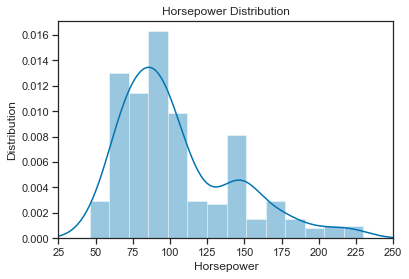

In [71]:
fig,ax = plt.subplots()
sns.distplot(mpg['horsepower'],ax=ax)
ax.set(xlabel='Horsepower',ylabel='Distribution',xlim=(25,250),
       title='Horsepower Distribution')

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


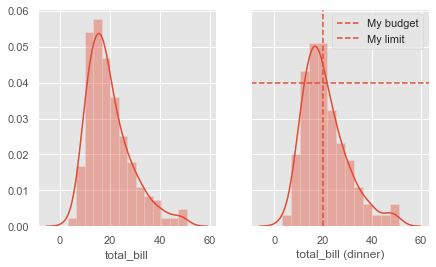

In [90]:
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(7,4))
plt.style.use('ggplot')
sns.distplot(tips['total_bill'],ax=ax0)
sns.distplot(tips.query("time =='Dinner'")['total_bill'],ax=ax1)
ax1.set(xlabel='total_bill (dinner)')
ax1.axvline(x=20,label='My budget',linestyle='--')
ax1.axhline(y=0.04,label='My limit',linestyle='--')
ax1.legend()

# Categorical data 

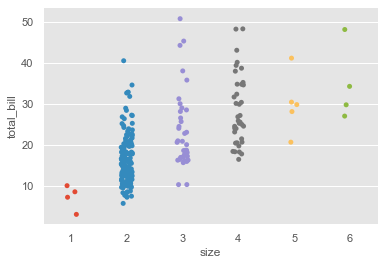

In [104]:
#stripplot
sns.stripplot(x='size',y='total_bill',data=tips,jitter=True)


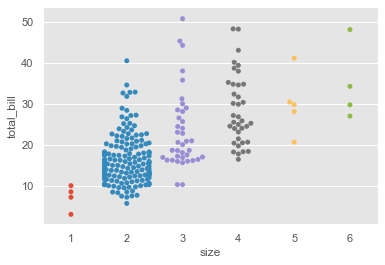

In [105]:
#swarmplot
sns.swarmplot(x='size',y='total_bill',data=tips)

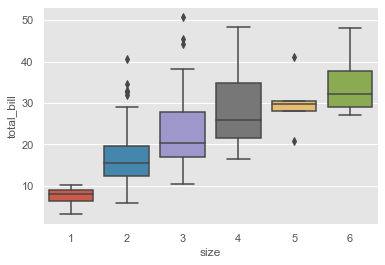

In [106]:
#boxplot
sns.boxplot(x='size',y='total_bill',data=tips)

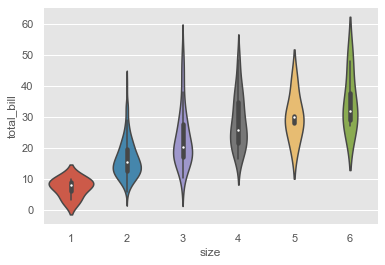

In [107]:
#violinplot
sns.violinplot(x='size',y='total_bill',data=tips)

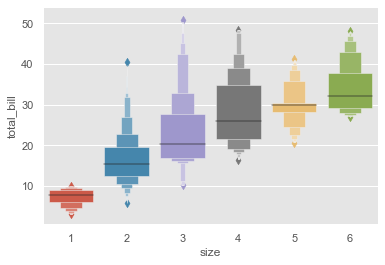

In [109]:
sns.boxenplot(x='size',y='total_bill',data=tips)

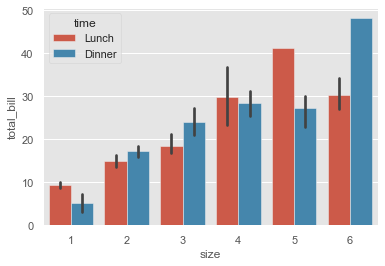

In [111]:
sns.barplot(x='size',y='total_bill',data=tips,hue='time')

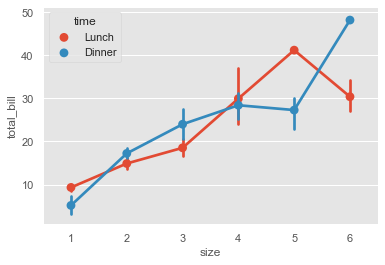

In [112]:
sns.pointplot(x='size',y='total_bill',data=tips,hue='time')

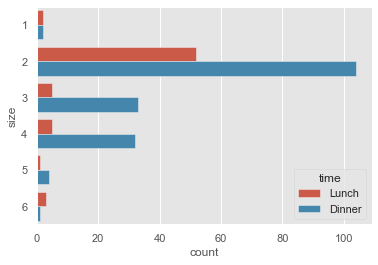

In [114]:
sns.countplot(y='size',data=tips,hue='time')

## regression plot

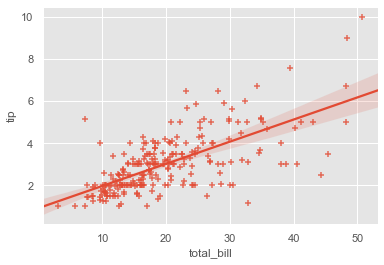

In [117]:
sns.regplot(x='total_bill',y='tip',data=tips,marker='+')

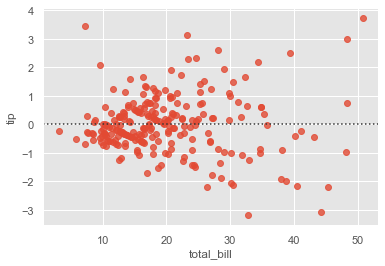

In [118]:
sns.residplot(x='total_bill',y='tip',data=tips)

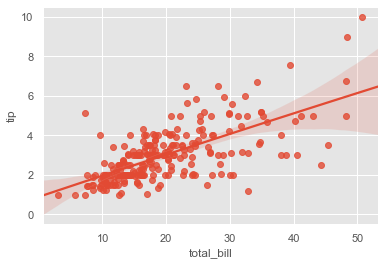

In [119]:
#polynomial: order=2,3......
sns.regplot(x='total_bill',y='tip',data=tips,order=2)

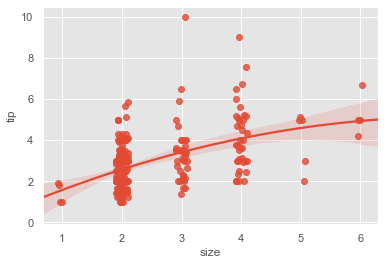

In [123]:
#categorical values
sns.regplot(x='size',y='tip',data=tips,x_jitter=0.1,order=2)

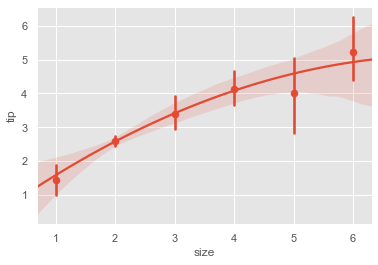

In [122]:
sns.regplot(x='size',y='tip',data=tips,x_estimator=np.mean,order=2)

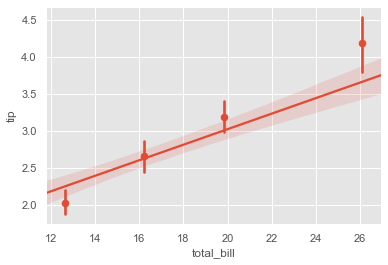

In [125]:
sns.regplot(x='total_bill',y='tip',data=tips,x_bins=4)

## Matrix Plot

In [126]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [129]:
tips_cross = pd.crosstab(tips['day'],tips['size'],values=tips['tip'],aggfunc='mean').round(2)
tips_cross = tips_cross.fillna(0)

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.44,2.69,4.22,5.00,5.3
Fri,1.92,2.64,3.00,4.73,0.00,0.0
Sat,1.00,2.52,3.80,4.12,3.00,0.0
Sun,0.00,2.82,3.12,4.09,4.05,5.0


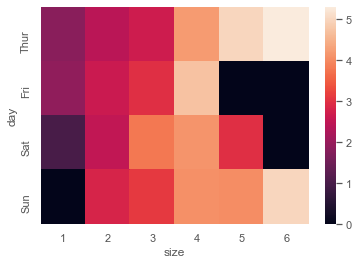

In [130]:
sns.heatmap(tips_cross)

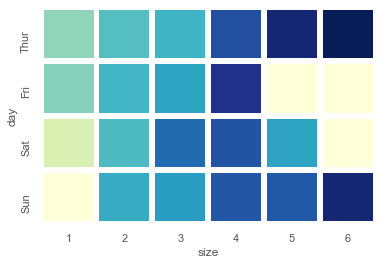

In [134]:
#annot:annotation, shows labels in the table; cbar:colorbar
sns.heatmap(tips_cross,annot=True,cmap='YlGnBu',cbar=False,linewidths=5)

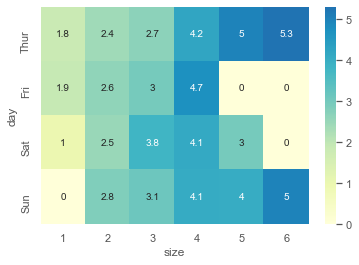

In [133]:
sns.heatmap(tips_cross,annot=True,cmap='YlGnBu',cbar=True,center=tips_cross.loc[2, 3])

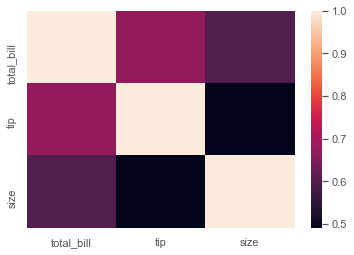

In [135]:
sns.heatmap(tips.corr())

# Using FacetGrid, factorplot and lmplot

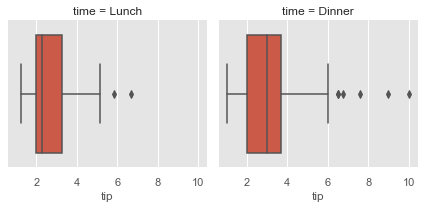

In [138]:
#FacetGrid
g = sns.FacetGrid(tips,col='time')
g.map(sns.boxplot,'tip',order=['Lunch','Dinner'])

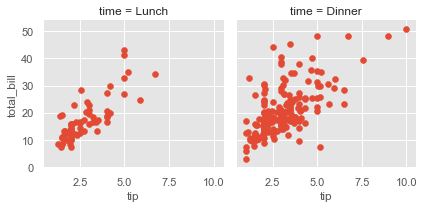

In [141]:
g = sns.FacetGrid(tips,col='time')
g.map(plt.scatter,'tip','total_bill')

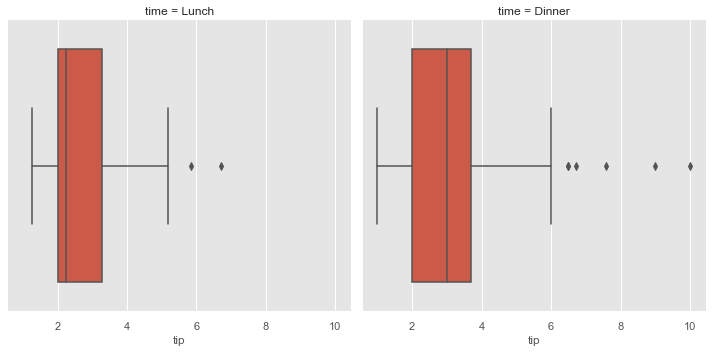

In [140]:
#factorplot
sns.catplot(x='tip',data=tips,col='time',kind='box')

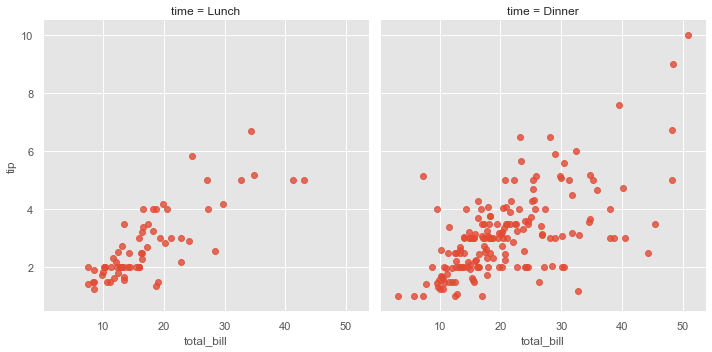

In [142]:
#lmplot
sns.lmplot(x='total_bill',y='tip',data=tips,col='time',fit_reg=False)

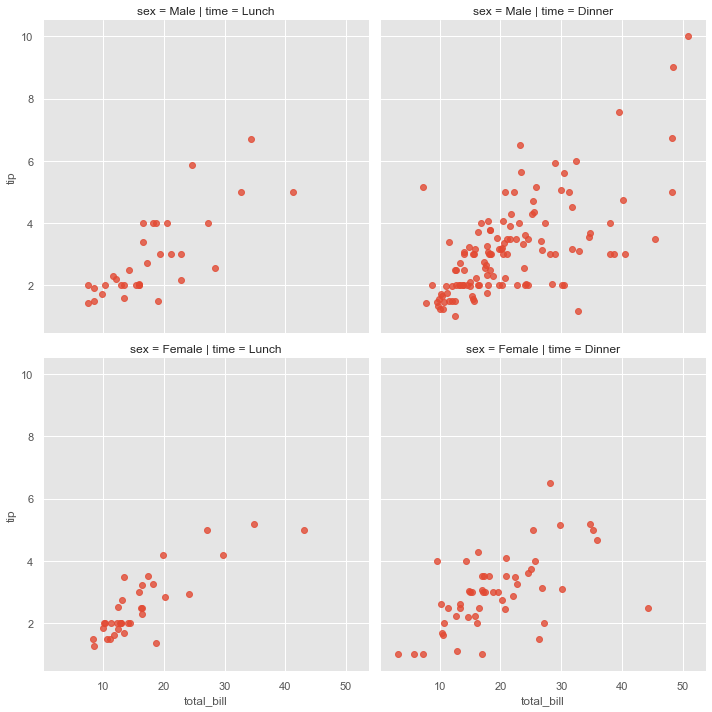

In [144]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='time',row='sex',fit_reg=False)

# PairGrid and pairplot

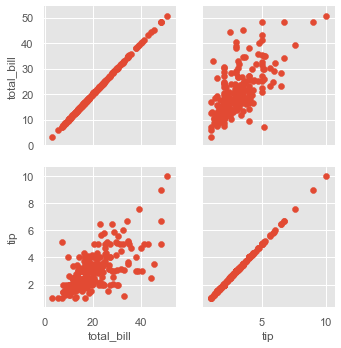

In [146]:
g = sns.PairGrid(tips,vars=['total_bill','tip'])
g = g.map(plt.scatter)

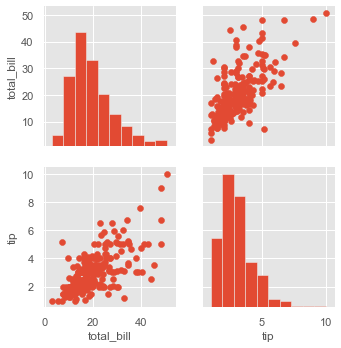

In [147]:
g = sns.PairGrid(tips,vars=['total_bill','tip'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

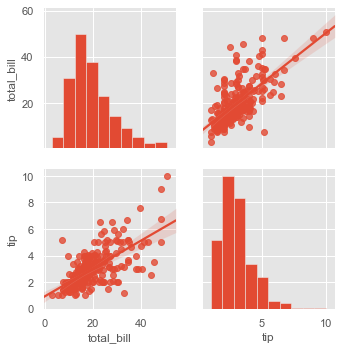

In [148]:
sns.pairplot(tips,vars=['total_bill','tip'],kind='reg',diag_kind='hist')

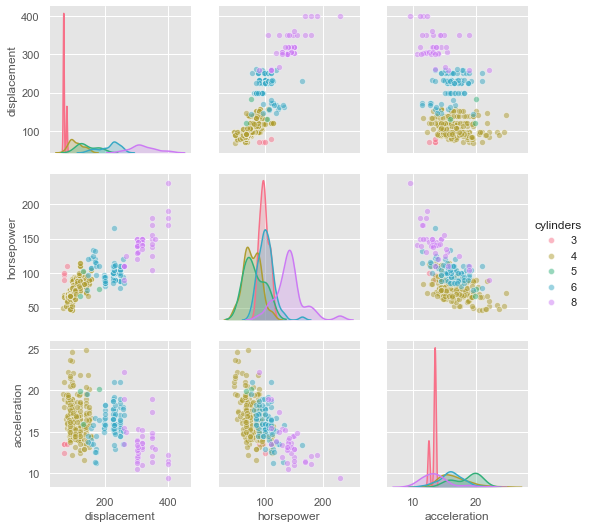

In [151]:
sns.pairplot(mpg.query('mpg>15'),vars=['displacement','horsepower','acceleration'],
             hue='cylinders',palette='husl',plot_kws={'alpha':0.5})

# JointGrid and jointplot

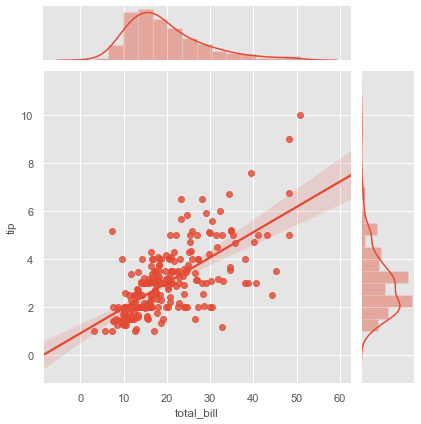

In [153]:
g = sns.JointGrid(x='total_bill',y='tip',data=tips)
g.plot(sns.regplot,sns.distplot)

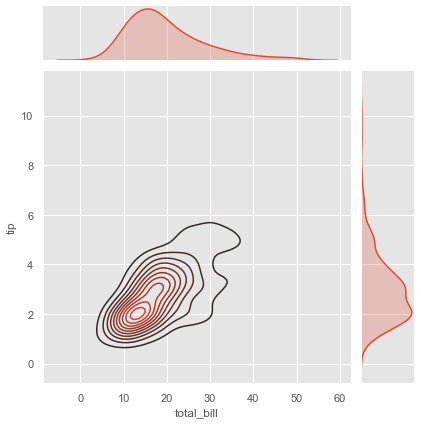

In [167]:
from scipy import stats as sst
g = sns.JointGrid(x='total_bill',y='tip',data=tips)
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot,shade=True)
#g = g.annotate(sst.pearsonr)

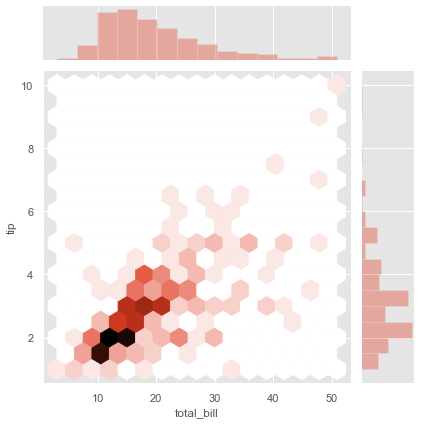

In [156]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

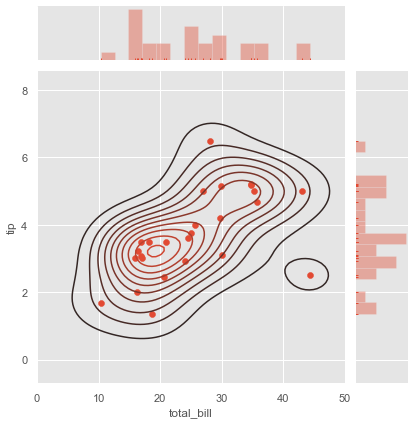

In [161]:
g = (sns.jointplot(x='total_bill',y='tip',data=tips.query('sex == "Female" & size>2'),
                   xlim=(0,50),marginal_kws=dict(bins=15,rug=True)).plot_joint(sns.kdeplot))

In [157]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
